<img alt="Colaboratory logo" width="80%" src="img/capa.png">

# Detectando de Fraudes em Transações com Cartões de Crédito
*by [Joviano Silveira](https://joviano.com)*  
*Mentorado por [CARLOS MELO](https://www.linkedin.com/in/carlosfab/) e [RAFAEL DUARTE](https://www.linkedin.com/in/rafael-n-duarte/) no curso [Data Science na Prática](https://sigmoidal.ai/)*

---

## 1. Apresentação do Tema

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. 

> **Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.**

Dentre essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acarretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um fator problema quando da elaboração de um algoritmo nesse tema, é a classificação errônea (pelo algoritmo) de possível fraude, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e `constrangimento`.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

### 1.1 Aviso Importante

Este trabalho é um estudo, para demonstrar aos iniciantes em DataScience, como criar uma solução de Machine Learning, e poder ter uma fonte de inspiração e criar uma solução para seu negócio.

É obvio que não vamos conseguir abordar todos os temas e melhores práticas, pois isso deixaria o trabalho muito denso, frente a proposta inicial.

Existe um espaço para melhoria, o qual você pode (e deve) explorar após a leitura e réplica desse conteúdo.

Espero que meu trabalho possa lhe ajudar.

## 2. Importando Bibliotecas

Vamos importar as bibliotecas no inicio do projeto, e demonstrar a versão delas, para que você possa replicar o case, exatamente como demonstrado nesse estudo.

In [1]:
# Lib responsável por capturar a versão da LIB instalada na máquina

from importlib_metadata import version
print('versão: ',version('importlib_metadata'))

versão:  3.1.1


In [2]:
# Manipulação de dataframes (tabelas)

import pandas as pd
print('versão: ',version('pandas'))

# Setar opção para mostrar todas as colunas
pd.set_option('display.max_columns', None)

versão:  1.1.5


In [3]:
import numpy as np
print('versão: ',version('numpy'))

versão:  1.18.3


In [4]:
# Biblioteca de Gráficos no Python

import matplotlib.pyplot as plt
print('versão: ',version('matplotlib'))

versão:  3.3.3


In [5]:
# Biblioteca de Gráficos no Python

import seaborn as sns
print('versão: ',version('seaborn'))

# Setar estilo dos gráficos com o Seaborn
sns.set_style('dark')

versão:  0.11.0


In [6]:
# Mostrar elementos de Youtube na Tela

from IPython.display import YouTubeVideo
print('versão: ',version('IPython'))

versão:  7.16.1


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
print('versão: ',version('scikit-learn'))

versão:  0.24.2


In [8]:
from imblearn.under_sampling import RandomUnderSampler
print('versão: ',version('imbalanced-learn'))

versão:  0.7.0


In [9]:
import scikitplot as skplt
print('versão: ',version('Scikit-plot'))

versão:  0.3.7


In [10]:
# Bibliotecas padrão do Python
import math   
import warnings
from zipfile import ZipFile
import os

# essas bibliotecas vem com o Python, logo, ela acompanha a versão do Python
import sys
sys.version

'3.6.6 (v3.6.6:4cf1f54eb7, Jun 27 2018, 03:37:03) [MSC v.1900 64 bit (AMD64)]'

In [11]:
# Não mostrar mensagens de alerta "chatas"
warnings.filterwarnings('ignore')

## 3. Importando os Dados

In [12]:
# Descompactando arquivo para pasta dados
ZipFile('dados/creditcard.zip', 'r').extractall('dados')

In [13]:
# importando dados
df = pd.read_csv('dados/creditcard.csv')

In [14]:
# Deletando arquivo excel
os.remove('dados/creditcard.csv') 

Os dados usados neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como se pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Os dados estão dispostos no [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud), e um detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

No site também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

Caso você nunca tenha visto essa técnica, separei esse vídeo rápido (em Português) do Mestre/Doutor Sr. [Jones Granatyr](https://www.linkedin.com/in/jones-granatyr-15398397/?originalSubdomain=br).

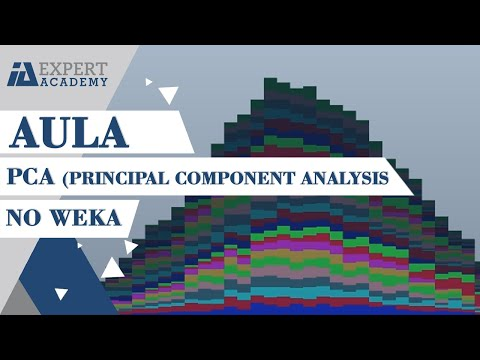

In [15]:
YouTubeVideo('THA8zBR64Kk', width=900, height=500)

## 4. Análise Exploratória

A seguir vamos visualizar, sem vicios, as primeiras e ultimas 10 linhas da tabela, para poder ter uma ideia de como os dados estão disposostos.

In [16]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [17]:
df.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,-0.612982,-0.066655,-0.732987,0.237948,-0.293959,-0.245496,-0.174846,-0.891169,-0.290491,-0.139512,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,-0.111640,-1.109232,-0.453235,-1.046946,1.122674,1.243518,-1.431897,0.939328,-0.002373,2.894952,0.006666,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,-0.594242,-1.264072,0.453596,-0.243142,-0.858719,-0.766554,-0.644646,0.447184,0.388721,0.792135,0.348176,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,0.523316,0.559047,-0.834660,0.626211,-0.541494,0.225361,-0.605252,-0.163049,0.561695,-0.256922,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,0.644837,0.190916,-0.546329,-0.731707,-0.808036,0.599628,0.070441,0.373110,0.128904,0.000676,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [18]:
# identificando o volume de dados do DataFrame
print("O conjunto de dados contém:")
print(df.shape[0],"\t linhas")
print(df.shape[1],"\t colunas")

O conjunto de dados contém:
284807 	 linhas
31 	 colunas


In [19]:
# verificando o tipo de dados do DataSet
for i in dict(df.dtypes).items():
    variavel = i[0]
    caracteres = '.'*(10-len(variavel))
    tipo = i[1]
    print(f'A variável [{variavel}]{caracteres} é do tipo {tipo}')

A variável [Time]...... é do tipo float64
A variável [V1]........ é do tipo float64
A variável [V2]........ é do tipo float64
A variável [V3]........ é do tipo float64
A variável [V4]........ é do tipo float64
A variável [V5]........ é do tipo float64
A variável [V6]........ é do tipo float64
A variável [V7]........ é do tipo float64
A variável [V8]........ é do tipo float64
A variável [V9]........ é do tipo float64
A variável [V10]....... é do tipo float64
A variável [V11]....... é do tipo float64
A variável [V12]....... é do tipo float64
A variável [V13]....... é do tipo float64
A variável [V14]....... é do tipo float64
A variável [V15]....... é do tipo float64
A variável [V16]....... é do tipo float64
A variável [V17]....... é do tipo float64
A variável [V18]....... é do tipo float64
A variável [V19]....... é do tipo float64
A variável [V20]....... é do tipo float64
A variável [V21]....... é do tipo float64
A variável [V22]....... é do tipo float64
A variável [V23]....... é do tipo 

Pudemos ver até então que estamos com um conjunto de dados com todas variáveis numéricas, e é possivel ver que as colunas cujo nome inicia com a letra `V` são oriundas da aplicação da técnica de `PCA (redução de dimensionalidade)`.
Porém as colunas `time (horário)` e `Amount (Valor)` foram preservadas.

Além disso, a última coluna da tabela, cujo nome é `Class` demonstra se foi fraude ou não (de forma binária [zero ou um]).

Agora vamos analisar se alguma coluna possui valores nulos:

In [20]:
df.isnull().sum().max()

0

Como não temos valores nulos, vamos visualizar agora a distribuição de valores das variáveis:

In [21]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,1.673327e-15,-1.254995e-15,8.176030e-16,1.206296e-15,4.913003e-15,1.437666e-15,-3.800113e-16,9.572133e-16,1.039817e-15,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


A distribuição dos dados mostra que `Amount` os três primeiros quartis estão inferiores a `$ 78`, ou seja, a maioria dos dados do dataset são valores pequenos, similares aos que nós gastamos em nosso dia a dia "em cada passada de cartão".

O valor máximo de uma transação foi `~$ 26 mil`, mas, o que chama atenção são "passadas de cartão" com valor zero.
> Infelizmente não temos mais detalhes a respeito dessas movimentações com valor zerado.

In [22]:
# Quantidade de movimentações com valor zerado

df.query('Amount == 0')['Class'].value_counts()

0    1798
1      27
Name: Class, dtype: int64

Mais uma vez, o que chamou atenção foram fraudes entre movimentações com valor ZERO.

> Não vamos expurgar esses dados, pois entendemos que as demais variáveis podem ser significativas para o cálculo estatistico da classificação.

## 4.1 Transações Legítimas x Fraudulentas

Antes de separarmos dados para treinar o modelo, precisamos verificar se `quantidade de fraudes` frente a `quantidade de operações legitimas` tem uma proporção capaz de entregar uma amostra minima (de fraudes), evitando assim um treinamento `zero fraude`.

In [23]:
operacoes = pd.DataFrame(df['Class'].value_counts())
operacoes['%'] = round(  operacoes['Class'] / df.shape[0] *100  ,2)
operacoes = operacoes.rename(columns={"Class" : "QTD_MOVIMENTOS"})
operacoes

,QTD_MOVIMENTOS,%
0,284315,99.83
1,492,0.17


> Não vou plotar gráfico aqui, pois esse `%` de `fraudes (1)` vai ficar oculto, frente à representatividade de `legitimas (0)`

Como temos apenas as variáveis `Amount` e `Time` que não passaram pelo processo de PCA, vamos analisar as fraudes por cada uma delas a seguir.

### 4.1.1 Analisando as fraudes por Time 

Antes de mais nada, vamos ver qual o valor máximo registrado em `Time`.
E vamos comparar com a quantidade de segundos disponível em um dia.

In [24]:
print('Time MAX:\t\t',df.Time.max())
print('Segundos MAX dia:\t',60*60*24)

Time MAX:		 172792.0
Segundos MAX dia:	 86400


Conseguimos ver que a variável `Time` representa o tempo no passo de `0.5 segundos`

Isso posto, para podermos analisar os dados sem necessidade de "fazer contas de cabeça", vou criar uma cópia isolada do dataset, para visualizarmos qual momento do dia há mais fraudes

In [25]:
df2 = df.copy()
df2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Criarei uma função que retornará frações de meia hora.

In [26]:
def hora(h):
    s = 1 # se quiser a cada meia hora, colocar 0.5
    x = math.floor(  h /60 /60 /2  /s)*s
    return x

In [27]:
df2['hora'] = df2.apply(lambda x:  hora(x.Time) ,axis=1 )
df2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hora
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,23
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,23
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,23
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,23


In [28]:
# Cores padrão a ser usadas nos gráficos
# Informando uma vez só, qualquer alteração, basta ser feita aqui
cores = {
    'legitima' : 'darkgreen',
    'fraude' : 'firebrick'
}

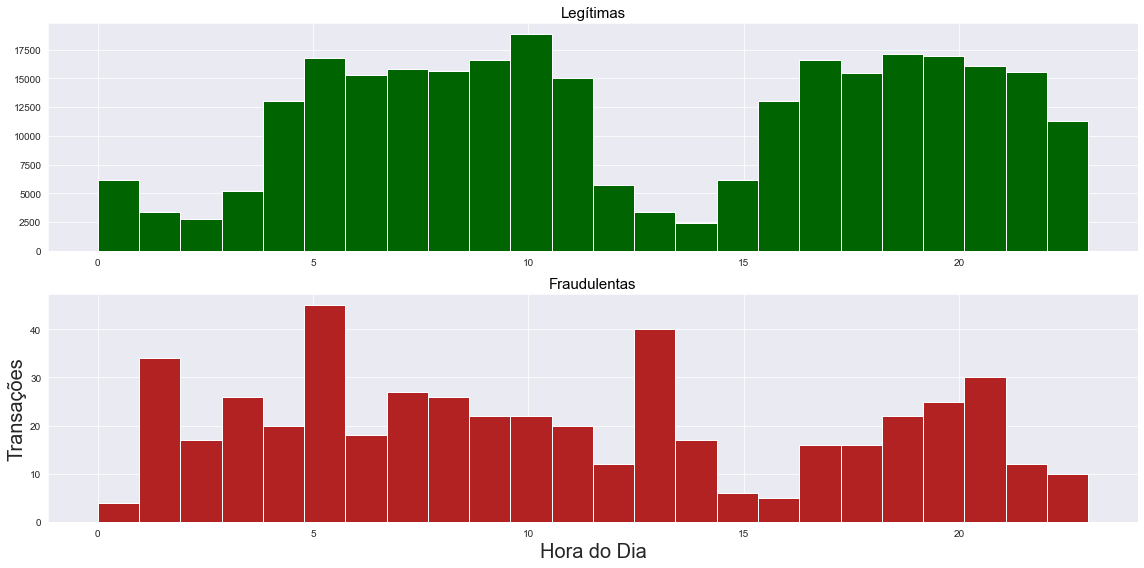

In [29]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,8))

num_bins = 24

ax[0].hist(df2.hora[df2.Class == 0], bins=num_bins, color=cores.get('legitima'))
ax[0].grid()
ax[0].set_title('Legítimas', color='k', fontsize = 15)

ax[1].hist(df2.hora[df2.Class == 1], bins=num_bins, color=cores.get('fraude'))
ax[1].grid()
ax[1].set_title('Fraudulentas', color='k', fontsize = 15)

plt.xlabel('Hora do Dia', fontsize = 20)
plt.ylabel('Transações', fontsize = 20)

plt.tight_layout()

> Para outras cores [clique aqui](https://matplotlib.org/stable/gallery/color/named_colors.html)

Analisando a quantidade de fraudes por hora, conseguimos perceber que existem alguns horários que se sobressaem, como `1, 5 e 13 horas`.

E atenção à esse último, que é um dos picos de fraude, e, é num horário que o movimento de compras legítimas tem um vale.

### 4.1.2 Analisando as fraudes por Amount (Valor)

A seguir vamos usar um BOXPLOT para podermos visualizar graficamente a distribuição dos valores entre as fraudes e legítimas, tentando identificar se exite alguma correlação.

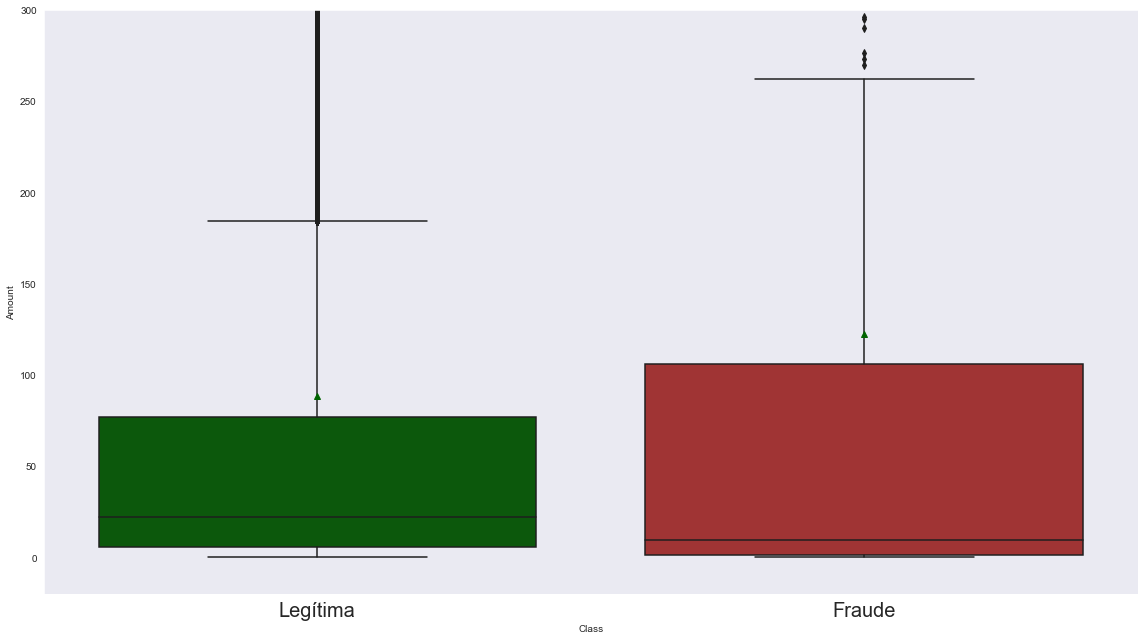

In [30]:
fig, ax = plt.subplots(figsize=(16,9), sharex=True)

# Setando as cores padrão
sns.set_palette(cores.values())

# Criando o BOXPLOT
sns.boxplot(x = df['Class'], y = df['Amount'], showmeans=True, ax=ax)

# Limite do BOX PLOT para não ficar uma "barra gigante"
plt.ylim((-20, 300))

# Colocando as legendas
plt.xticks([0, 1], ['Legítima', 'Fraude'], fontsize = 20)

# Mostrando (no lugar do SHOW)
plt.tight_layout();

> Usei `$ 300` como valor máximo, pois o `terceiro quartil` das fraudes está na casa dos `~$ 275`

Analisando o comportamento destes elementos do gráfico, podemos visualizar que a mediana dos valores `fraude` é inferior ao `legitimo`, ou seja, leva a crer que os criminosos tendem a usar valores baixos, tentamdo **passar despercebidos**.

Se analisarmos 75% dos movimentos fraudulentos são inferiores a `$ 106`, e destes, 2/3 abaixo de `$ 10`, reforçando nosso sentimento descrito acima.

Veja os mesmos dados do gráfico anterior, em formato tabela, complementando a explicação.

In [31]:
pd.DataFrame( df.query('Class == 1')['Amount'].describe() ).rename(columns={'Amount':'!!! FRAUDES !!!'})

,!!! FRAUDES !!!
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


### 4.1.3 Comparando demais variáveis 

Para compararmos demais variáveis, vamos usar um gráfico de densidade:

> "*O gráfico de densidade mostra como os dados numéricos, agrupados em intervalos, são distribuídos entre os eixos X e Y. Para visualizar a densidade, isto é, visualizar em que medida os marcadores se sobrepõem totalmente, a configuração Por cor é usada.*"
> [Fonte: TIBCO](https://docs.tibco.com/pub/spotfire_server/10.1.0/doc/html/pt-BR/TIB_sfire-bauthor-consumer_usersguide/GUID-1FCED7C1-8FC8-4F19-B880-85D54570A90B.html)

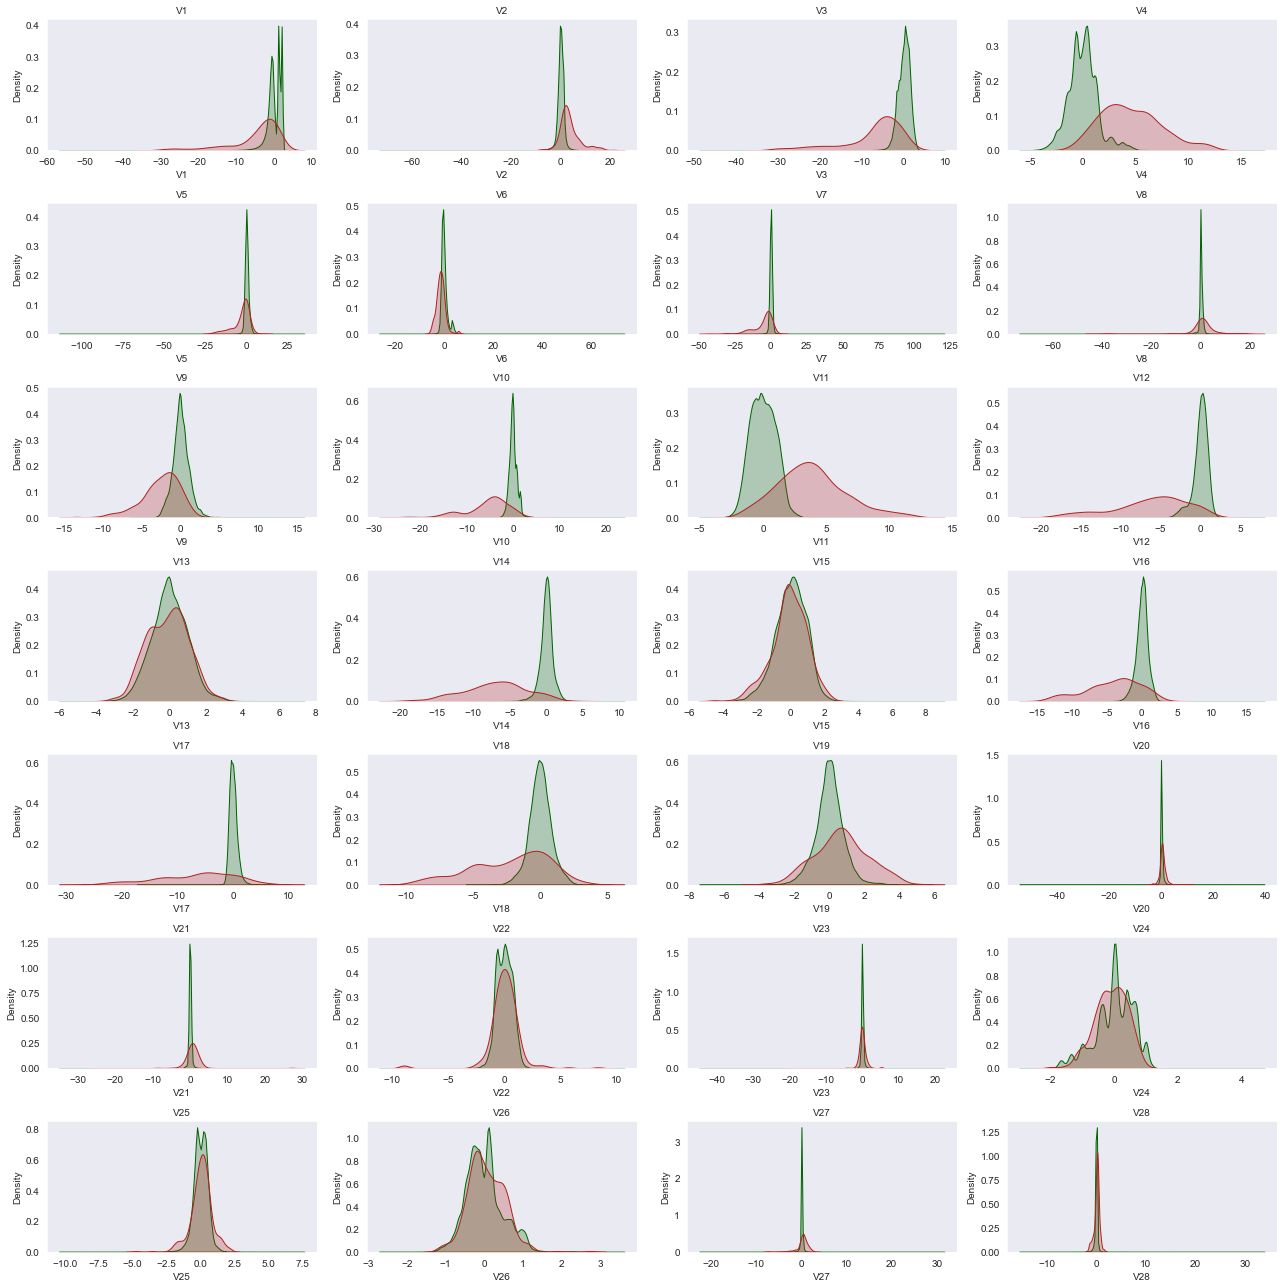

In [32]:
# Filtrando dados que serão mostrados
df_class_0 = df.query('Class == 0')
df_class_1 = df.query('Class == 1')

# Preparando os dados que serão plotados
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns    # Lista de nome das colunas sem deletando as colunas alvo 
num_plots = len(column_names)                                          # Quantidade de colunas da tabela limpa

# criando o objeto (figura) que vai receber os gráficos
linhas = 7
colunas = 4
fig, ax = plt.subplots(nrows=linhas, ncols=colunas, figsize=(18,18))

# normalizando espaços entre os subplots
fig.subplots_adjust(hspace=1, wspace=1)

# Criando os subplots
idx = 1
for col in column_names:
    
    plt.subplot(linhas, colunas, idx)
    sns.kdeplot(df_class_0[col], label="Class 0", shade=True) # Legítima
    sns.kdeplot(df_class_1[col], label="Class 1", shade=True) # Fraude
    plt.title(col, fontsize=10)
    
    # incrementar variável indicando o subplot
    idx += 1    
    
# mostrar grafico e subplots
plt.tight_layout()


O que chama atenção logo à primeira vista?
> - `V3`, `V4`, `V9-12`, `V17` e `V18` mostram um comportamento diferente entre as variáveis;
>
> - Nas demais podemos ver um comportamento "colado".

Isso já nos dá ideia do "porquê" das decisões possivelmente tomadas pelo algoritmo.

### 4.1.4 Resumo da análise exploratória

- Existem muitos valores zero no dataset, os quais não fazem sentido em uma analise inicial;
- A quantidade de fraude frente às operações legítimas é pequena (menos de 1%), e ao separar os dados, temos que tomar cuidado para que amostras de fraudes sejam consideradas;
- Existe uma concentração de fraudes com valor pequeno (cerca de $ 10), e também, em um determinado horario do dia, em que as movimentações legitimas são poucas;
- Analisando as demais variáveis que passaram pela técnica de PCA, conseguimos verificar algumas, que as fraudes "saltam ao olhos"

## 5. Preparação dos Dados

O Modelo de Machine Learning que será usado neste case é a `REGRESSÃO LOGÍSTICA`, pois queremos classificar os dados, de acordo com variáveis quantitativas.

Para isso precisamos preparar nossos dados, efetuando algumas limpezas e adequações, para ai sim, "fatiar" os dados entre treino e teste.

Antes de mais nada, para "ISOLAR" os dados de treino e teste, vamos dividir os dados, sendo `85%` para treino e `15%` para teste.

In [33]:
# criando o conjunto de teste
test = df.sample(frac=0.15, random_state=0)

# limpar de DF as linhas do dataset `test` criado acima
df = df.drop(test.index)

# verificando o conjunto
print("Dimensões do Conjunto de Teste:\t\t", test.shape)
print("Dimensões do Conjunto de Treino:\t", df.shape)

Dimensões do Conjunto de Teste:		 (42721, 31)
Dimensões do Conjunto de Treino:	 (242086, 31)


### 5.1 Padronizar Time e Amount

In [34]:
# Fazendo uma cópia dos dados para outra instância em memória
# Qualquer alteração em uma, não alterará em outra.
df_tratado = df.copy() 

In [35]:
# Algoritmo que padroniza os valores para uma grade de valores pre estabelecidos.
std_scaler = StandardScaler()

# Novas Features Tratadas
df_tratado['std_amount']   = std_scaler.fit_transform(df_tratado['Amount'].values.reshape(-1, 1))
df_tratado['std_time']     = std_scaler.fit_transform(df_tratado['Time'].values.reshape(-1, 1))

# Deletando Features que foram tratadas
df_tratado.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
df_tratado.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.246341,-1.997399
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.346945,-1.997399
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.171178,-1.997378
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140872,-1.997378
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.075195,-1.997357
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0,-0.342988,-1.997357
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0,-0.337658,-1.997315
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0,-0.193061,-1.997251
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0,0.018524,-1.997251
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0,-0.342947,-1.997209


> **StandardScaler** Transforma os dados de maneira que tenha média como 0 e desvio padrão como 1. Em resumo, padroniza os dados. 
>
> A padronização é útil para dados que possuem valores negativos. Ele organiza os dados em uma distribuição normal padrão.
>
> [Fonte: qastack](https://qastack.com.br/datascience/45900/when-to-use-standard-scaler-and-when-normalizer#:~:text=StandardScaler%20%3A%20Transforma%20os%20dados%20de,em%20uma%20distribui%C3%A7%C3%A3o%20normal%20padr%C3%A3o%20.)

### 5.2 Dividir os dados entre treino e teste

Agora chegamos em uma parte delicada de nosso algoritmo, que é a divisão dos dados entre treino e teste, mas como já viemos falando anteriormente, a quantidade de movimentos fraudulentos é muito menor que os genuinos, logo, se só rodássemos um "fatiamento" simples, provavelmente, poderiamos perder varias amostras de dados de fraudes, e nosso modelo seria mal treinado.

Mesmo assim, vamos "rachar" das duas maneiras para que fique evidente a aplicação da técnica.

### 5.2.1 Dividindo os dados DESBALANCEADOS 

Vamos usar `X` para os dados que conhecemos e `y` para os que queremos descobrir.

Ao dividir os dados "conhecemos" os dois, mas temos que pensar depois, que vamos dispor de dados e queremos prever quem? **o `y`**

In [36]:
# Retirar o y do dataset
X = df_tratado.drop('Class', axis=1)

# Pegar somente o y
y = df_tratado['Class']

# dividir entre treino e teste
X_train, X_val, y_train, y_val = train_test_split(X, 
                                                  y, 
                                                  stratify=y,      # leia abaixo
                                                  shuffle=True,    # embaralhar os dados antes de "fatiar"?
                                                  test_size = 0.25 # tamanho do dataset de teste
                                                 )

> **stratify** faz uma divisão de forma que a proporção dos valores na amostra produzida seja a mesma que a proporção dos valores fornecidos ao parâmetro stratify.
>
> Por exemplo, se a variável `y` é uma variável categórica binário com valores `0` e `1`, e há 25% de zeros e 75% dos queridos, `stratify=y` vai se certificar de que a sua divisão aleatória tem 25% de 0's e 75% de 1' s.
>
> [Fonte: StackOverFlow](https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn)

In [37]:
print('O conjunto de treino possui:\t',len(X_train),'linhas')
print('O conjunto de TESTE possui:\t',len(X_val),'linhas')

O conjunto de treino possui:	 181564 linhas
O conjunto de TESTE possui:	 60522 linhas


Para visualizar o parametro `stratify=y` em ação, veja que com ele ativo, a proporção de 0´s e 1´s foi mantida.

In [38]:
round( y_train.sum() / len(X_train) * 100 ,2)

0.17

In [39]:
round( y_val.sum() / len(X_val) * 100 ,2)

0.17

> Você pode testar, retirando o parâmetro, e verá que a proporção das duas células acima deste notebook serão diferentes

### 5.2.2 Dividindo os dados BALANCEADOS 

Vamos usar uma biblioteca própria para trabalhar com dados desbalanceados, e o nome dela é `imblearn`.

Com ela, conseguiremos criar nosso conjunto de treino, com a mesma quantidade de `Fraude` e `Legitimos`

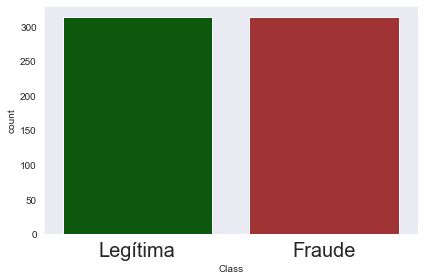

In [40]:
# under-sampling
bal = RandomUnderSampler()
X_train_bal, y_train_bal = bal.fit_sample(X_train, y_train)

# plotar a nova distribuição de classes
sns.countplot(y_train_bal)

# Colocando as legendas
plt.xticks([0, 1], ['Legítima', 'Fraude'], fontsize = 20)

# mostrar grafico e subplots
plt.tight_layout();

In [41]:
# ver o balanceamento das classes
print(pd.Series(y_train_bal).value_counts())

1    313
0    313
Name: Class, dtype: int64


Agora vamos comparar, através de matriz de correlação, as variáveis de treino com e sem a técnica de balanceamento (under-sampling)

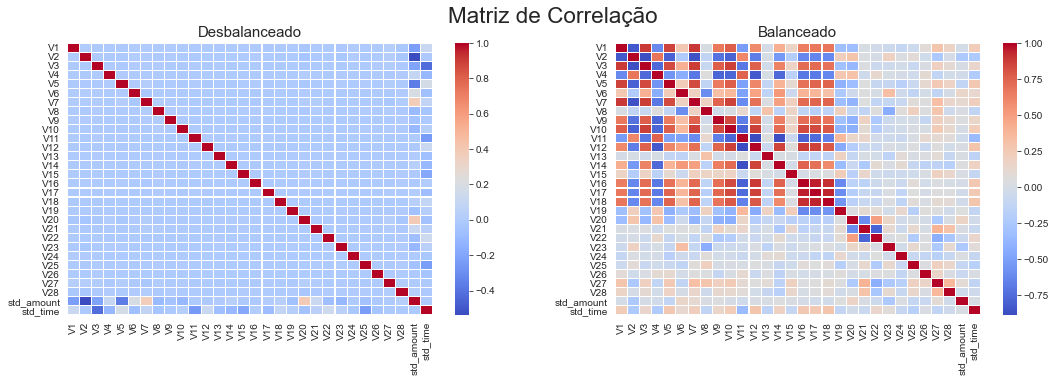

In [42]:
corr     = X_train.corr()
corr_bal = pd.DataFrame(X_train_bal).corr()

fig, ax  = plt.subplots(nrows=1, 
                        ncols=2, 
                        figsize = (18,5)
                       )

tamanho_fonte_titulos = 15

fig.suptitle('Matriz de Correlação', fontsize = tamanho_fonte_titulos * 1.5)

# grafico DESBALANCEADO
sns.heatmap(corr, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns,
            linewidths=.1, 
            cmap="coolwarm", 
            ax=ax[0]
           )

ax[0].set_title('Desbalanceado', fontsize = tamanho_fonte_titulos)

# grafico BALANCEADO
sns.heatmap(corr_bal, 
            xticklabels=corr_bal.columns, 
            yticklabels=corr_bal.columns,
            linewidths=.1, 
            cmap="coolwarm", 
            ax=ax[1]
           )

ax[1].set_title('Balanceado', fontsize = tamanho_fonte_titulos)

plt.show()

Vou te ajudar a entender os dois gráficos acima, que "de largada" já mostram uma diferença gritante "nas corzinhas".

Se você olhar a matriz de correlação entre as variáveis dos dados desbalanceados, verá que parece algo binário, ou seja, é azul ou vermelho, sem meio termos, algo que não é bom para nosso modelo de inteligência artificial.

Mas olhando para o gráfico com os dados balanceados, podemos ver que vários tons de vermelho e azul aparecem, evidenciando o grau de calor de relação entre as variáveis.

Ou seja, com os dados balanceados, nosso modelo de Machine Learning terá menos chance de erro, pois ele consegue entender melhor relação entre as variáveis.

## 6. Modelo de Machine Learning

Chegamos à parte mais esperada do trabalho, que é o treinamento de nosso modelo de Machine Learning (Inteligencia Artificial).

Para isso vamos usar as ferramentas da biblioteca `sklearn`, com os dados de treino BALANCEADOS. 

In [43]:
# Definindo um seed (semente) para que toda vez que o modelo for executado, ele chegue ao mesmo resultado
seed = np.random.seed(2)

# Escolhendo o modelo de Inteligência Artificial (IA) e passando hiperparâmetros
model = LogisticRegression(random_state = seed)

# Treinando o modelo de IA -> USANDO DADOS BALANCEADOS
model.fit(X_train_bal, y_train_bal)

# fazer as previsões em cima dos dados de teste
y_pred  = model.predict(X_val)
y_proba = model.predict_proba(X_val)

In [44]:
def metricas(val, pred):

    # matrix de confusão
    skplt.metrics.plot_confusion_matrix(val, pred, normalize=True)

    # relatório de classificação
    print("Relatório de Classificação:\n\n", classification_report(val, pred, digits=4))

    # acurácia do modelo
    print("Acurácia: {:.4f}\n".format(accuracy_score(val, pred)))

    # área sob da curva
    print("AUC: {:.4f}\n".format(roc_auc_score(val, pred)))

Relatório de Classificação:

               precision    recall  f1-score   support

           0     0.9998    0.9715    0.9854     60417
           1     0.0512    0.8857    0.0969       105

    accuracy                         0.9713     60522
   macro avg     0.5255    0.9286    0.5412     60522
weighted avg     0.9981    0.9713    0.9839     60522

Acurácia: 0.9713

AUC: 0.9286



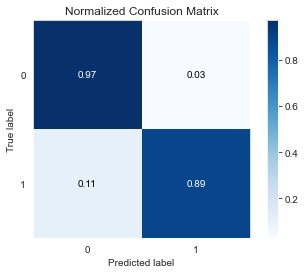

In [45]:
metricas(y_val, y_pred)

Analisando a avaliação do desempenho, e neste tipo de problema, originalmente desbalanceado, a acurácia não é uma métrica adequada. 
> Conforme explicado por *Carlos Melo* [neste artigo](http://sigmoidal.ai/como-lidar-com-dados-desbalanceados/), <mark>**você pode ter uma acurácia de 99,88% e detectar menos de 60% das fraudes**</mark>.

Observe a matriz de confusão para ver a taxa de acertos para `transações fraudulentas`, ou pela coluna `recall` do Relatório de Classificação. 

Uma outra métrica considerada interessante para se avaliar a eficácia é a [AUC ROC](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772), ou área sob a curva. 
No caso desse modelo de Regressão Logística, no nosso case, tem-se mais de 90% de AUC.

## 7. Avaliar o desempenho do modelo

Vamos então aplicar o mesmo algoritmo acima para sobre os dados de teste, e para isolar o dataset de teste, vamos criar o `test` em outra instância de memória com o uso do `.copy()`

Vou "rodar" na mesma célula, pois anteriormente foi só para mostrar como funciona e tecer comenários parte-a-parte.

Relatório de Classificação:

               precision    recall  f1-score   support

           0     0.9999    0.9727    0.9861     42647
           1     0.0560    0.9324    0.1057        74

    accuracy                         0.9727     42721
   macro avg     0.5279    0.9526    0.5459     42721
weighted avg     0.9982    0.9727    0.9846     42721

Acurácia: 0.9727

AUC: 0.9526



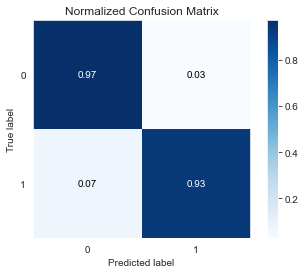

In [46]:
# padronizar as colunas Time e Amount - Teste
test_clean = test.copy()

# Algoritmo que padroniza os valores para uma grade de valores pre estabelecidos.
std_scaler = StandardScaler()

# Novas Features Tratadas
test_clean['std_amount']  = std_scaler.fit_transform(test_clean['Amount'].values.reshape(-1, 1))
test_clean['std_time']    = std_scaler.fit_transform(test_clean['Time'].values.reshape(-1, 1))

# Deletando Features que foram tratadas
test_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# separar variáveis entre X e y
X_test = test_clean.drop('Class', axis=1)
y_test = test['Class']

# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

metricas(y_test, y_pred)

A boa noticia (ótima na verdade) é que os padrões detectados pelo algoritmo de machine learning no conjunto de treino, apresentou mais de 90% de Acurácia e AUC nos dados de teste.

## 8. Conclusão

Levando em consideração que os dados vieram bem tratados, limpos, e com a técnica de PCA aplicada, tivemos um trabalho considerável de balanceamento e identificação de padrões dos nossos dados.

O próximo passo aqui é a **otimização dos hiperparâmetros** que ainda pode dar um ganho em nossos indicadores de fidelidade do modelo criado, o que estenderia demais esse `notebook` e tornaria mais avançado do que a proposta inicial.

---
### Conheça meu trabalho

<a href="https://www.joviano.com">
<img src="https://raw.githubusercontent.com/jovianosilveira/img/master/joviano-silveira-site-logo.png" alt="joviano.com" width="5%">
</a>

<a href="https://www.youtube.com/jovianosilveira">
<img src="https://github.com/jovianosilveira/img/blob/master/joviano-silveira-youtube-logo.png?raw=true" alt="joviano.com" width="5%">
</a>

<a href="http://www.linkedin.com/in/jovianosilveira">
<img src="https://github.com/jovianosilveira/img/blob/master/joviano-silveira-linkedin-logo.png?raw=true" alt="joviano.com" width="5%">
</a>

<a href="https://www.instagram.com/jovi.silveira">
<img src="https://github.com/jovianosilveira/img/blob/master/joviano-silveira-instagram-logo.png?raw=true" alt="joviano.com" width="5%">
</a>

<a href="https://www.facebook.com/jovi.silveira.cursos">
<img src="https://github.com/jovianosilveira/img/blob/master/joviano-silveira-facebook-logo.png?raw=true" alt="joviano.com" width="5%">
</a>